# Additional Data Set
In this notebook we will preprocess the additional dataset for our project of classification of newsquotes into categories.
We will make use of the BBC news articles dataset that can be seen below. It is a datat set that contains thousands of news articles classified into five categories: *Business*, *Entertainement*, *Sports*, *Tech*, *Politics*.

The goal is to train a machine learning model capable of reading a quote and assigning it to one of these five categories. For this we will first have a look at the BBC news articles dataset and clean it. In a subsequent step we will train and test our model on this same dataset. Finally the model will be used to classify the quotes of the quotebank dataset. 

In [1]:
import pandas as pd
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [8]:
#importing the train set
train = './BBC_data/BBC News Train.csv'
train_data = pd.read_csv(train)

In [9]:
train_data.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


## Let's look at the content
Here we will explore the content of the train data set: we will look at the present categories, the number of datapoints and we will check for missing values. 

In [10]:
#We have five distinct categories: business, tech, politics, sports, and entertainement 
train_data['Category'].unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

In [11]:
#how many data points do we have ?
#we have 1490 data points and three columns: Article id, Text and the category that the article belongs to
train_data.shape

(1490, 3)

In [12]:
#Now we check if there are missing values
train_data.isnull().any()

ArticleId    False
Text         False
Category     False
dtype: bool

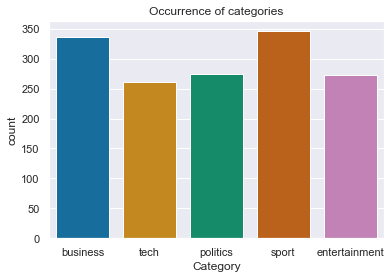

In [13]:
#Here we see how the data is balanced. We don't have a clear oversampling. 
sns.set_theme(style="darkgrid")
sns.set_palette("colorblind")
ax = sns.countplot(x="Category", data=train_data).set_title('Occurrence of categories')

## Dealing with word length
We know that this dataset contains news artices. Howvere, the quotebank dataset that we wish to classify contains quotes. The differene between the two is that news articles most likely are much longer than quotes. This means that we will probably have to truncate the news articles to match the average length of the quotes

In [14]:
#Let's look at the lentgh of the articles
train_data['Text'].str.len()

0       1866
1       2016
2       3104
3       3618
4       2190
        ... 
1485    1266
1486    3111
1487    1370
1488    3242
1489    1723
Name: Text, Length: 1490, dtype: int64

In [15]:
#we add a column to our train data set that contains the length of the quotes
train_data['len_of_article'] = train_data['Text'].str.len()
train_data['len_of_article']

0       1866
1       2016
2       3104
3       3618
4       2190
        ... 
1485    1266
1486    3111
1487    1370
1488    3242
1489    1723
Name: len_of_article, Length: 1490, dtype: int64

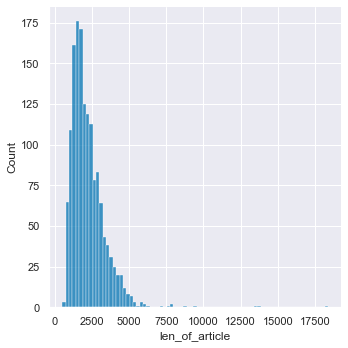

In [16]:
sns.set_theme(style="darkgrid")
sns.set_palette("colorblind")
sns.displot(data=train_data, x="len_of_article")


In [17]:
#let's print some summary statistics 
train_data['len_of_article'].describe()

count     1490.000000
mean      2233.461745
std       1205.153358
min        501.000000
25%       1453.000000
50%       1961.000000
75%       2751.250000
max      18387.000000
Name: len_of_article, dtype: float64

In [18]:
#and the median
train_data['len_of_article'].median()

1961.0

We can see in the notebook where we explored the Quotebank dataset, that these values are much higher than for the quotes we will ultimately classify. Therefore, it might be useful to truncate these articles before training our model on it. We will truncate these articles at 200 characters.


In [19]:
train_data['truncated']=train_data['Text'].str.slice(stop=200)
train_data['len_of_truncated_article'] = train_data['truncated'].str.len()


In [20]:
train_data.head()

,ArticleId,Text,Category,len_of_article,truncated,len_of_truncated_article
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866,worldcom ex-boss launches defence lawyers defe...,200
1,154,german business confidence slides german busin...,business,2016,german business confidence slides german busin...,200
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104,bbc poll indicates economic gloom citizens in ...,200
3,1976,lifestyle governs mobile choice faster bett...,tech,3618,lifestyle governs mobile choice faster bett...,200
4,917,enron bosses in $168m payout eighteen former e...,business,2190,enron bosses in $168m payout eighteen former e...,200


## Cleaning the data
Here we will do any cleaning of the data. We will remove unecessary characters and stopwords. We will only apply this cleaning to the truncated articles

In [21]:
def process_text(text):
    #removing some characters
    text = text.lower().replace('\n',' ').replace('\r','').strip()
    text = re.sub(' +', ' ', text)
    text = re.sub(r'[^\w\s]','',text)
    
    #removing stopwords that will not contribute to the classification
    stop_words = set(stopwords.words('english')) 
    word_tokens = word_tokenize(text) 

    filtered_sentence = [] 
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    
    text = " ".join(filtered_sentence)
    return text

In [22]:
train_data['clean_truncated'] = train_data['truncated'].apply(process_text)

In [23]:
train_data

,ArticleId,Text,Category,len_of_article,truncated,len_of_truncated_article,clean_truncated
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866,worldcom ex-boss launches defence lawyers defe...,200,worldcom exboss launches defence lawyers defen...
1,154,german business confidence slides german busin...,business,2016,german business confidence slides german busin...,200,german business confidence slides german busin...
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104,bbc poll indicates economic gloom citizens in ...,200,bbc poll indicates economic gloom citizens maj...
3,1976,lifestyle governs mobile choice faster bett...,tech,3618,lifestyle governs mobile choice faster bett...,200,lifestyle governs mobile choice faster better ...
4,917,enron bosses in $168m payout eighteen former e...,business,2190,enron bosses in $168m payout eighteen former e...,200,enron bosses 168m payout eighteen former enron...
...,...,...,...,...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment,1266,double eviction from big brother model caprice...,200,double eviction big brother model caprice holb...
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment,3111,dj double act revamp chart show dj duo jk and ...,200,dj double act revamp chart show dj duo jk joel...
1487,1590,weak dollar hits reuters revenues at media gro...,business,1370,weak dollar hits reuters revenues at media gro...,200,weak dollar hits reuters revenues media group ...
1488,1587,apple ipod family expands market apple has exp...,tech,3242,apple ipod family expands market apple has exp...,200,apple ipod family expands market apple expande...


In [24]:
train_data.to_csv('./BBC_data/cleaned_Train.csv')

## Preprocess the test set
The only thing we will do on the test set is to preprocess it in the same way as we did for the train dataset. That is, check for Nan values, truncate the articles and process the text in order to drop the useless charaters and words. 

In [2]:
#importing the test set
test = './BBC_data/BBC News Test.csv'
test_data = pd.read_csv(test)

In [3]:
test_data['truncated']=test_data['Text'].str.slice(stop=200)
test_data['len_of_truncated_article'] = test_data['truncated'].str.len()
test_data.head()

,ArticleId,Text,truncated,len_of_truncated_article
0,1018,qpr keeper day heads for preston queens park r...,qpr keeper day heads for preston queens park r...,200
1,1319,software watching while you work software that...,software watching while you work software that...,200
2,1138,d arcy injury adds to ireland woe gordon d arc...,d arcy injury adds to ireland woe gordon d arc...,200
3,459,india s reliance family feud heats up the ongo...,india s reliance family feud heats up the ongo...,200
4,1020,boro suffer morrison injury blow middlesbrough...,boro suffer morrison injury blow middlesbrough...,200


In [5]:
test_data['clean_truncated'] = test_data['truncated'].apply(process_text)

In [6]:
test_data.to_csv('./BBC_data/cleaned_Test.csv')

## Next steps
Next we will have to apply the same data cleaning and truncation to our test dataset which is also provided. We will also apply the same cleaning to the Quotebank dataset. 

In a next step we will also try different machine learning models such as random forest, logistic regression, k neighbors classifier and naive bayes classifier. We will assess their quality by applying them on the test set and then we will chose the best and apply it to the quotebank dataset.

## The techniques that we will try
In our future steps we will train a machine learning model tryng out different techniques.

### Logistic regression
In this technique, instead of modeling the response directly, we model the probability that the output falls under a certain category. Based on this probability, we then assign each element to a category. 

$\begin{split}
P(t=1| z) & = \sigma(z) = \frac{1}{1+e^{-z}} \\
P(t=0| z) & = 1 - \sigma(z) = \frac{e^{-z}}{1+e^{-z}} 
\end{split}$

where $z = \sum_{i=0}^{p}\beta_i x_i$ and $x_i$ are the predictors and the $\beta_i$ are the parameters to be estimated.

Even though the logistic regression technique is usually used for binary classification, we can adapt it to multiclass classification. We will make use of the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">sklearn method</a> for logistic regression. In this method, we can use the one-vs-rest method to overcome the fact that we have multiple classes. This splits a multi-class classification into one binary classification problem per class. 

The loss function used for this method is the maximum likelihood estimator. This allows us to find the parameters $\beta_i$:

$\underset{\theta}{\text{argmax}}\; \mathcal{L}(\theta|t,z) = \underset{\theta}{\text{argmax}} \prod_{i=1}^{n} \mathcal{L}(\theta|t_i,z_i)$. where $\mathcal{L}(\theta|t,z) = P(t|z,\theta) = \prod_{i=1}^{n} P(t_i|z_i,\theta)$


### Random forest
The idea behind random forest is to train a series of decision trees with the possibility to bootstrap the dataset. Another feature of random forest is that at each split in each decision tree, the model is only allowed to use part of the predictors. This allows to decorrelate the different trees that are built. When using the random forest to classify data points, we look at the class that is predicted by most decision trees.

We will again use the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html"> random forest method</a> sklearn. 

### Naive bayes classifier

This is a classification algorithm based on Bayes’ Theorem with an assumption of independence between the features.

Naïve Bayes is a conditional probability model: given a problem instance to be classified, represented by a vector $x = (x_1,…,x_n)$ representing some $n$ features (independent variables), it assigns to this instance probabilities
$p(C_k|x_1,...,x_n)$ for each of $K$ possible outcomes or classes $C_k$.

Using Bayes' theorem, the conditional probability can be written as
$p(C_k|x)=\frac{p(C_k)p(x|C_k)}{p(x)}$.

In practice, there is interest only in the numerator of that fraction, because the denominator does not depend on $C$ and the values of the features $x_i$ are given, so that the denominator is effectively constant. The numerator is equivalent to the joint probability model $p(C_k,x_1,...,x_n)$, which can be rewritten as follows, using the chain rule for repeated applications of the definition of conditional probability: $p(C_k,x_1,...,x_n)=p(x_1|x_2,...,x_n,C_k)p(x_2|x_3,...,x_n,C_k)...p(x_{n-1}|x_n, C_k)p(x_n|C_k)p(C_k)$.

Now the "naive" conditional independence assumptions come into play: assume that all features in $x$ are mutually independent, conditional on the category $C_k$. Under this assumption, $p(x_i|x_{i+1},...,x_n,C_k)=p(x_i|C_k)$.

Thus, the joint model can be expressed as $p(C_k|x_1,...,x_n)\propto p(C_k)\prod_{i=1}^{n}p(x_i|C_k)$, where $\propto$ denotes proportionality.

The discussion so far has derived the independent feature model, that is, the naive Bayes probability model. The naive Bayes classifier combines this model with a decision rule. One common rule is to pick the hypothesis that is most probable; this is known as the maximum a posteriori or MAP decision rule. The corresponding classifier, a Bayes classifier, is the function that assigns a class label $y=C_k$ for some $k$ as follows:
$y=\underset{k\in{1,...,K}}{\text{argmax}}p(C_k)\prod_{i=1}^{n}p(x_i|C_k)$.

The description of this machine learning model and formulas were taken from <a href="https://en.wikipedia.org/wiki/Naive_Bayes_classifier">Wikipedia</a>.

To implement this technique, we will use sklearn method <a href="https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB">sklearn method</a> for naive bayes classifier.

### k-nearest neighbors classifier 
This is a non-parametric classification method. The input to the algorithm consists of the $k$ closest training examples in a data set. In $k$-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its $k$ nearest neighbors.

The training examples are vectors in a multidimensional feature space, each with a class label. The training phase of the algorithm consists only of storing the feature vectors and class labels of the training samples.

In the classification phase, $k$ is a user-defined constant, and an unlabeled vector (a query or test point) is classified by assigning the label which is most frequent among the $k$ training samples nearest to that query point.

The description of this machine learning model was taken from <a href="https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm">Wikipedia</a>.

To implement this technique, we will use sklearn method <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html">sklearn method</a> for $k$-NN classifier.

What should we use as distance?